In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('students_tarea.csv')

In [3]:
df.drop('ParentEduc', axis='columns', inplace=True)

In [4]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [5]:
df.Gender = df.Gender.map({'male': 0, 'female': 1})
df.EthnicGroup = df.EthnicGroup.map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4})
df.LunchType = df.LunchType.map({'standard': 0, 'free/reduced': 1})
df.TestPrep = df.TestPrep.map({'none': 0, 'completed': 1})

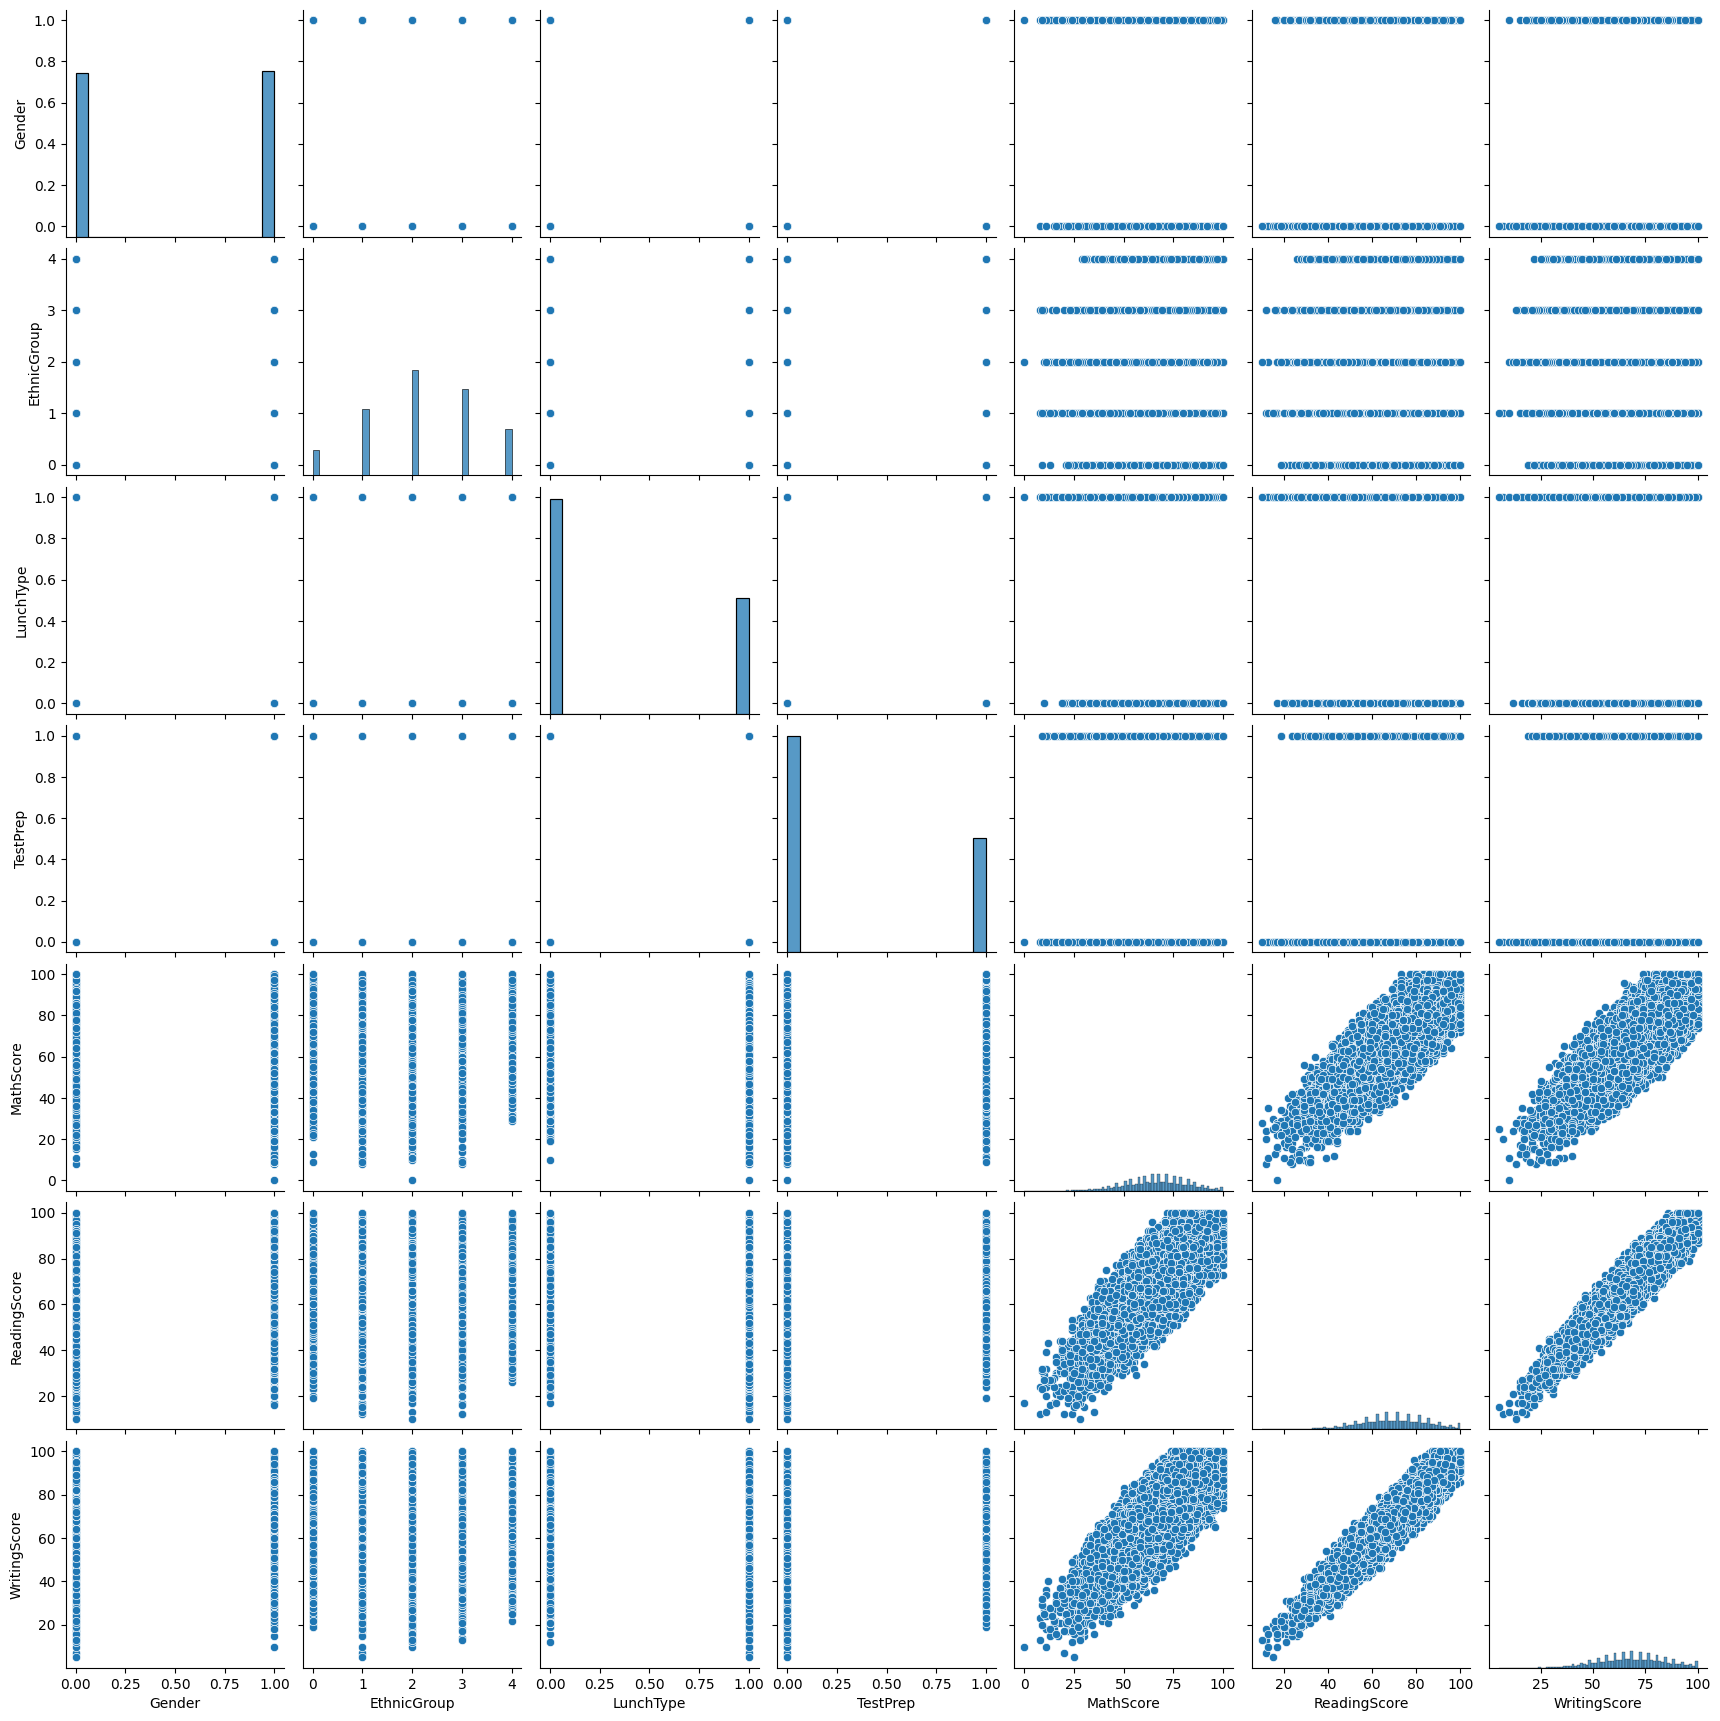

In [6]:
sb.pairplot(df)

In [7]:
data_x = df.drop('Gender', axis=1)
data_y = df.Gender
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=0.9)

In [8]:
decission_tree = tree.DecisionTreeClassifier()

In [9]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [10]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4)* 100}%')

Score: 83.1%


In [13]:
gender_labels = {0: 'male', 1: 'female'}
ethnic_labels = {0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}
lunch_labels = {0: 'standard', 1: 'free/reduced'}
preparation_labels = {0: 'none', 1: 'completed'}
ethnic = 3
lunch = 0
prep = 0
math = 56
read = 47
write = 51

In [14]:
pre = decission_tree.predict([[ethnic, lunch, prep, math, read, write]])
print(f'Una persona que pertenece al grupo étnico {ethnic_labels[ethnic]}, tiene un tipo de alimentación {lunch_labels[lunch]}, tiene un nivel de preparación {preparation_labels[prep]}, tiene un {math}/100 en matemáticas, {read}/100 en lectura y {write}/100 en escritura, pertenece al sexo {gender_labels[pre[0]]}')

Una persona que pertenece al grupo étnico group D, tiene un tipo de alimentación standard, tiene un nivel de preparación none, tiene un 56/100 en matemáticas, 47/100 en lectura y 51/100 en escritura, pertenece al sexo male


c:\Users\Julian\Desktop\Algoritmica Avanzada\clasificadores\clasificador_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
